In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv("results/percent_accuracy.csv",index_col=0)
data

data["method"] = data["method"].str.replace("LZ76_adapted","Adapted LZ76").replace("PLT","Plotnik").replace("ENTROY","Entropy")
data["dataset"] = data["dataset"].str.replace("RNA_encoded","RNA").replace("INPUT_OUTPUT","FST").replace("POLYNOMIAL","Polynomial").replace("TIME_SERIES","Time series").replace("LOGISTIC","Logistic").replace("CHEN","ODE")

In [6]:
data.method.unique()
hue_order = ['Adapted LZ76', 'LZ76', 'LZ78','CTW', 'Plotnik','BDM','ENTROPY']
order = ["Time series","Polynomial","RNA","Logistic","FST","ODE"]

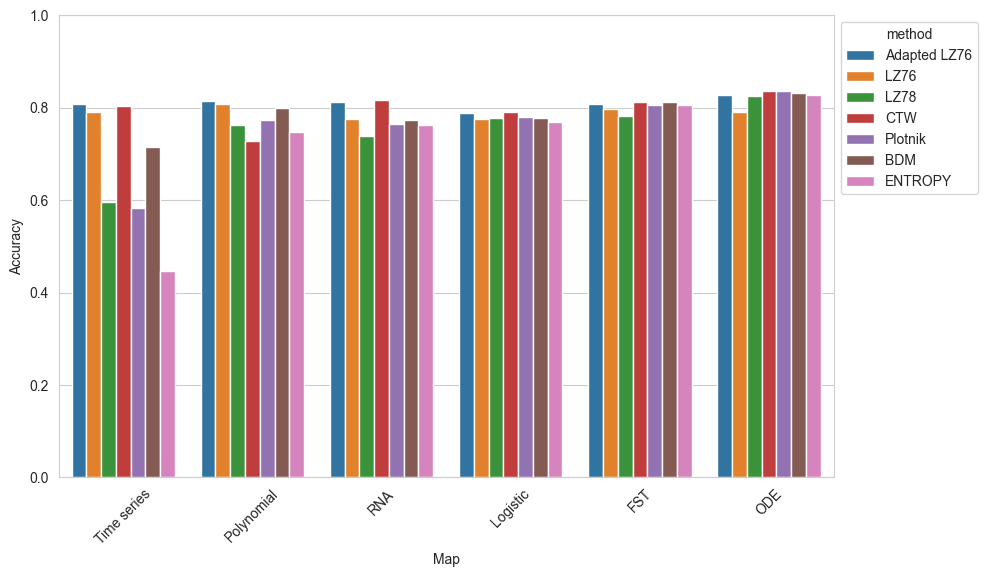

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from KC_methods import methods
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x='dataset', y='distribution', hue='method', data=data,order=order,hue_order=hue_order)
plt.xticks(rotation=45)
plt.ylim(0,1)
# plt.yscale("log")
sns.set_style("whitegrid")
plt.ylabel("Accuracy")
plt.xlabel("Map")
# hue_order = df.groupby('class')['survived'].mean().sort_values().index
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

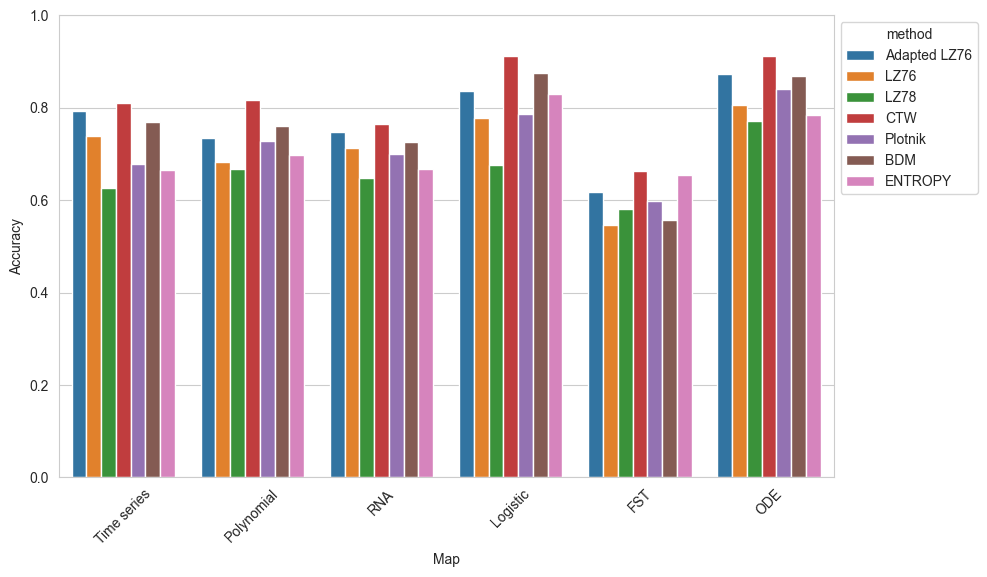

In [9]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x='dataset', y='uniform', hue='method', data=data,order=order,hue_order=hue_order)
plt.xticks(rotation=45)
plt.ylim(0,1)
# plt.yscale("log")
sns.set_style("whitegrid")
plt.ylabel("Accuracy")
plt.xlabel("Map")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [12]:
import plotly.express as px

# Create the bar chart using Plotly
fig = px.bar(data, x='dataset', y='distribution', color='method',barmode='group')

# Update layout
fig.update_layout(
    title='Comparison of Methods for Each Dataset',
    xaxis_title='Dataset',
    yaxis_title='Values',
    xaxis={'categoryorder': 'total descending'}  # Sort x-axis categories by total value
)

fig.show()